In [4]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
movie_dataset = pd.read_csv("Movie_Compiled.csv")
movie_dataset.head()

,Rating,Date,Title,Review
0,,12 April 2012,An Unstoppable Force of Awesomeness! All Hail ...,I have got to tell anyone who will listen that...
1,,19 April 2012,They balanced everything masterfully. As Good ...,"If you're a fan of epic adventure movies, then..."
2,10.0,20 April 2012,The Avengers assembled flawlessly,I'm sorry to say The Avengers isn't a good mov...
3,9.0,16 April 2012,LA Review of 'The Avengers' (No spoilers),LA Review of 'The Avengers' (No spoilers)\r\n\...
4,10.0,2 July 2017,Bad-ass descent-amazing superhero MCU action f...,Marvel's The Avengers (2012) is an awesome des...


In [6]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  4175 non-null   object
 1   Date    4502 non-null   object
 2   Title   4502 non-null   object
 3   Review  4402 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [7]:
movie_dataset.Rating.value_counts()

10.0    1173
1.0      722
9.0      454
8.0      323
7.0      298
6.0      256
5.0      234
3.0      225
2.0      218
4.0      205
          67
Name: Rating, dtype: int64

In [8]:
movie_dataset.Rating.value_counts().index

Index(['10.0', '1.0', '9.0', '8.0', '7.0', '6.0', '5.0', '3.0', '2.0', '4.0',
       ' '],
      dtype='object')

In [9]:
def convert_to_number(x):
    try:
        return float(x)
    except:
        return np.nan

In [10]:
 movie_dataset["Rating"]=movie_dataset.Rating.map(convert_to_number)

In [11]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  4108 non-null   float64
 1   Date    4502 non-null   object 
 2   Title   4502 non-null   object 
 3   Review  4402 non-null   object 
dtypes: float64(1), object(3)
memory usage: 140.8+ KB


In [14]:
movie_dataset_new = movie_dataset[~movie_dataset["Review"].isnull()]
movie_dataset_new

,Rating,Date,Title,Review
0,NaN,12 April 2012,An Unstoppable Force of Awesomeness! All Hail ...,I have got to tell anyone who will listen that...
1,NaN,19 April 2012,They balanced everything masterfully. As Good ...,"If you're a fan of epic adventure movies, then..."
2,10.0,20 April 2012,The Avengers assembled flawlessly,I'm sorry to say The Avengers isn't a good mov...
3,9.0,16 April 2012,LA Review of 'The Avengers' (No spoilers),LA Review of 'The Avengers' (No spoilers)\r\n\...
4,10.0,2 July 2017,Bad-ass descent-amazing superhero MCU action f...,Marvel's The Avengers (2012) is an awesome des...
...,...,...,...,...
4496,10.0,17 August 2005,A little story,After an attack by a pack of saber-toothed cat...
4498,9.0,25 June 2004,Great characters in a fun adventure!,"""Ice Age"" gives us a sabertooth tiger, a sloth..."
4499,10.0,1 June 2004,"""We are definitely the weirdest tribe I've eve...","Ice Age was a very entertaining movie, with br..."
4500,9.0,25 April 2004,This was a cool movie,"Ice Age, thats a good title. I was very confus..."


In [18]:
movie_dataset_new.Rating.value_counts()

10.0    1143
1.0      719
9.0      428
8.0      301
7.0      288
6.0      252
5.0      232
3.0      225
2.0      218
4.0      202
Name: Rating, dtype: int64

In [16]:
movie_dataset.Rating.isnull().sum()

394

In [17]:
only_reviews = " ".join(movie_dataset_new.Review)

In [24]:
wc = WordCloud(width = 1200, height = 800, max_words= 200, stopwords=STOPWORDS, background_color= "white")

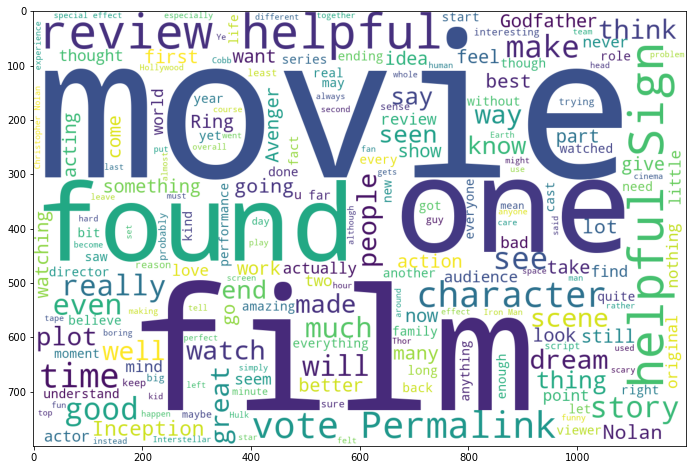

In [25]:
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [27]:
movie_dataset.Review[30]

"The Avengers movie must be a dream come true to everyone. Seeing these superheroes uniting together to save the world in the big screen. While the heroes' stand alone films doesn't have that enough action, this movie executes more of their super abilities. It's really fun and exciting. A lot of people will cheer to their favorite superheroes. This is what all fans and moviegoers want in Avengers. More fighting, more explosions, more smashing, and more fun. In the end, you will crave for more because of its awesomeness. The Avengers is simply marvelous.\r\n\r\nOur modern blockbusters are just full of explosions that makes no sense, bland characters, and too long runtime. The runtime here is long but it's necessary. The storytelling is quite simple as it gets. We already knew who these characters are. The best part is when they develop their relationship to each other. This happened mostly in the second act. These scenes are funny and entertaining. It's more entertaining when there's Ro

In [52]:
tf = CountVectorizer(token_pattern="[a-z']+",max_df=0.35,min_df=10,stop_words=STOPWORDS,ngram_range=(2,2)) #\b is word boundary #term-frequency #unigram = (1,1),bigram = (2,2)e.g. prime-minister #max_df =0.6 
                       #any word occurring more than 60 percnt will not be cosidered
                       #min_df = rare words will not be taken into considerations
                       

In [53]:
tf_mat = tf.fit_transform(movie_dataset_new.Review) #should be supplied as list or series or array
tf_mat

<4402x2968 sparse matrix of type '<class 'numpy.int64'>'
	with 66858 stored elements in Compressed Sparse Row format>

In [54]:
tf.vocabulary_ #giving the words along with the column number

{'one best': 1875,
 'movies seen': 1718,
 'almost impossible': 61,
 'expectations high': 605,
 'see movie': 2328,
 'movie good': 1567,
 'describe movie': 421,
 'movie awesome': 1495,
 'every little': 575,
 'see one': 2330,
 'one many': 1916,
 'many things': 1403,
 'together fight': 2645,
 'many characters': 1386,
 'larger life': 1218,
 'people even': 2002,
 'widow hawkeye': 2851,
 'captain america': 270,
 'entire cast': 542,
 'mark ruffalo': 1411,
 'every actor': 569,
 'seen better': 2340,
 'every single': 585,
 'iron man': 1147,
 'scarlett johansson': 2281,
 'character arcs': 285,
 'course film': 383,
 'film will': 800,
 'want give': 2740,
 'give away': 886,
 'away movie': 130,
 'movie review': 1634,
 'one film': 1891,
 'every scene': 583,
 'saw movie': 2263,
 'even though': 565,
 'avengers movie': 125,
 'going say': 923,
 'hulk thor': 1094,
 'must see': 1757,
 'type film': 2697,
 'instant classic': 1137,
 'movie really': 1631,
 'high quality': 1061,
 'previous work': 2099,
 'popcorn 

In [55]:
word_freq = tf_mat.sum(axis=0)[0]

In [56]:
word_freq #sum of every columns 

matrix([[11, 22, 28, ..., 11, 18, 10]], dtype=int64)

In [57]:
word_freq.shape

(1, 2968)

In [59]:
np.array(word_freq).reshape(tf_mat.shape[1],)

array([11, 22, 28, ..., 11, 18, 10], dtype=int64)

In [60]:
word_freq = np.array(tf_mat.sum(axis=0)).reshape(tf_mat.shape[1],)

In [61]:
word_freq

array([11, 22, 28, ..., 11, 18, 10], dtype=int64)

In [62]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse[2]

"'the ring'"

In [63]:
word_freq_dict={}
for k,v in tf.vocabulary_.items():
    v = word_freq[v]
    word_freq_dict[k]=v

In [64]:
word_freq_dict

{'one best': 269,
 'movies seen': 63,
 'almost impossible': 16,
 'expectations high': 11,
 'see movie': 194,
 'movie good': 232,
 'describe movie': 12,
 'movie awesome': 23,
 'every little': 14,
 'see one': 24,
 'one many': 26,
 'many things': 40,
 'together fight': 13,
 'many characters': 61,
 'larger life': 18,
 'people even': 16,
 'widow hawkeye': 24,
 'captain america': 299,
 'entire cast': 18,
 'mark ruffalo': 117,
 'every actor': 19,
 'seen better': 10,
 'every single': 82,
 'iron man': 427,
 'scarlett johansson': 74,
 'character arcs': 10,
 'course film': 11,
 'film will': 92,
 'want give': 11,
 'give away': 20,
 'away movie': 10,
 'movie review': 14,
 'one film': 38,
 'every scene': 66,
 'saw movie': 63,
 'even though': 199,
 'avengers movie': 38,
 'going say': 13,
 'hulk thor': 25,
 'must see': 80,
 'type film': 18,
 'instant classic': 12,
 'movie really': 139,
 'high quality': 13,
 'previous work': 11,
 'popcorn movie': 14,
 'never seen': 82,
 'good film': 78,
 'film made': 8

In [65]:
word_freq_dict_sorted = {
    k:v for k,v in sorted(word_freq_dict.items(),key = lambda item: item[1],reverse=True)
}

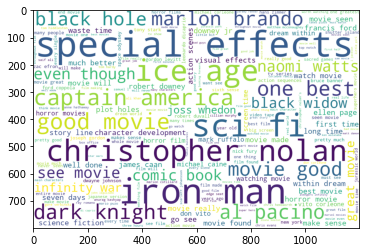

In [66]:
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))